In [13]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from torch_geometric.loader import DataLoader
from CustomDataset import CustomDataset

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## UC variation

In [14]:
## Read UC in testing set
all_UC = []

max_num = 1199  # Max number

for i in range(max_num):
    # File path
    UC_path = f'../../data/IEEE_Case118/outputs/UC/sample_{i+1}.csv'

    # Read wind and load
    try:
        UC = pd.read_csv(UC_path, header=None, index_col=None)
    except FileNotFoundError:
        print(f'The file sample_{i+1} is not found')
        continue

    all_UC.append(UC.values.copy())

# Convert to numpy array
all_UC = np.array(all_UC)

# Get UC in val/test set
val_UC = all_UC[700:800].copy()
test_UC = all_UC[800:].copy()

The file sample_4 is not found
The file sample_8 is not found
The file sample_15 is not found
The file sample_25 is not found
The file sample_27 is not found
The file sample_35 is not found
The file sample_37 is not found
The file sample_41 is not found
The file sample_42 is not found
The file sample_43 is not found
The file sample_45 is not found
The file sample_57 is not found
The file sample_58 is not found
The file sample_64 is not found
The file sample_71 is not found
The file sample_80 is not found
The file sample_81 is not found
The file sample_85 is not found
The file sample_86 is not found
The file sample_89 is not found
The file sample_91 is not found
The file sample_97 is not found
The file sample_99 is not found
The file sample_102 is not found
The file sample_114 is not found
The file sample_124 is not found
The file sample_144 is not found
The file sample_149 is not found
The file sample_152 is not found
The file sample_158 is not found
The file sample_175 is not found
Th

## UC variation in Val dataset

In [15]:
val_UC_variation = np.zeros(val_UC.shape)

# Get UC variation in each time step
val_UC_variation[:, :, 1:] = val_UC[:, :, 1:] - val_UC[:, :, :-1]

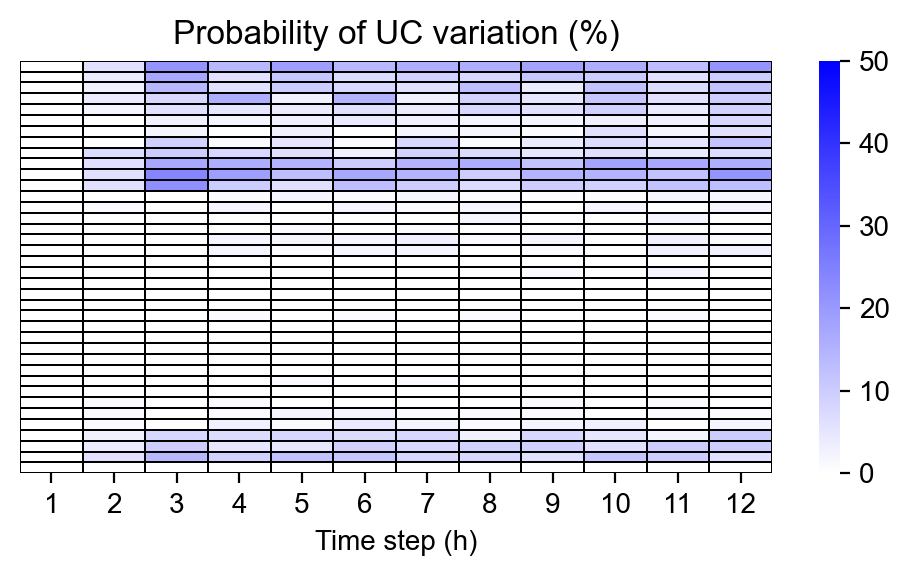

In [16]:
# Plot UC variation rate in each time step
# Create a custom continuous colormap
colors = ["white", "blue"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)  # N=256 for a smooth transition

vmin = 0
vmax = 50

xticks = np.arange(1, 13)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
sns.heatmap(np.abs(val_UC_variation).mean(axis=0)*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar=True, xticklabels=xticks, yticklabels=False)
ax.set_title('Probability of UC variation (%)')
ax.set_xlabel('Time step (h)')

plt.tight_layout()
plt.show()
plt.close('all')

In [17]:
# Get UC ON/OFF variation in each time step
val_UC_ON_variation = (val_UC_variation > 0).astype(int)
val_UC_OFF_variation = (val_UC_variation < 0).astype(int)

# Get UC ON/OFF variation rate in each time step
val_UC_ON_variation_rate = val_UC_ON_variation.mean(axis=0)
val_UC_OFF_variation_rate = val_UC_OFF_variation.mean(axis=0)

In [18]:
# Create subplots
gs = GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1], wspace=0.05, hspace=0.3)

# Create a custom continuous colormap
colors = ["purple", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)  # N=256 for a smooth transition

vmin = -50
vmax = 50

/var/folders/cn/s2z4sz3n33n4m238vt6kj7j40000gn/T/ipykernel_41358/2056608092.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


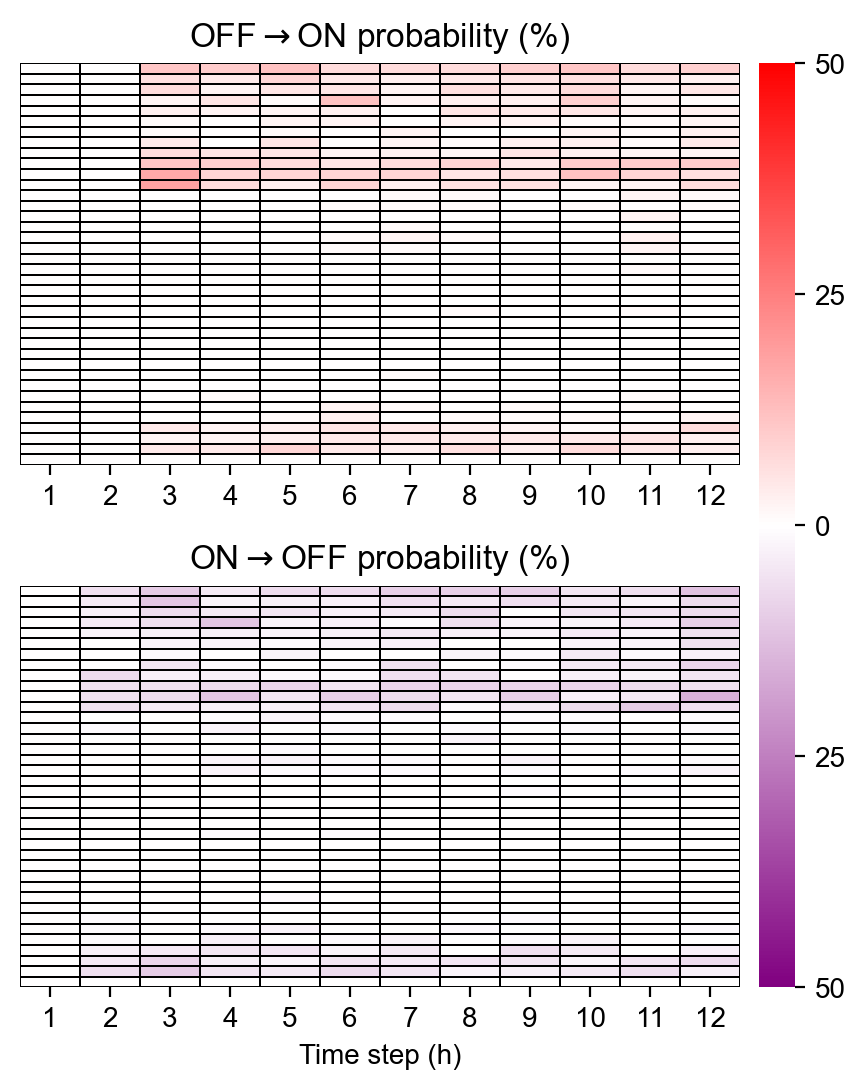

In [19]:
## Plot UC OFF to ON proportion
fig = plt.figure(figsize=(5, 6))
# Colorbar
cbar_ax = fig.add_subplot(gs[:, 1])

# UC OFF --> ON proportion
ax = fig.add_subplot(gs[0, 0])
xticks = np.arange(1, 13)
sns.heatmap(val_UC_ON_variation_rate*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar=False, xticklabels=xticks, yticklabels=False)
ax.set_title('OFF$\\rightarrow$ON probability (%)')

# UC ON --> OFF proportion
ax = fig.add_subplot(gs[1, 0])
xticks = np.arange(1, 13)
sns.heatmap(-val_UC_OFF_variation_rate*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar_ax=cbar_ax, xticklabels=xticks, yticklabels=False,
            cbar_kws={'ticks': np.linspace(-100, 100, 9)})
ax.set_xlabel('Time step (h)')
ax.set_title('ON$\\rightarrow$OFF probability (%)')

# Change colorbar ticcklables to positive
cbar_ax.set_yticklabels(np.abs(np.linspace(-100, 100, 9)).astype(int))

plt.tight_layout()
plt.show()
plt.close('all')

## UC variation in test dataset

In [20]:
test_UC_variation = np.zeros(test_UC.shape)

# Get UC variation in each time step
test_UC_variation[:, :, 1:] = test_UC[:, :, 1:] - test_UC[:, :, :-1]

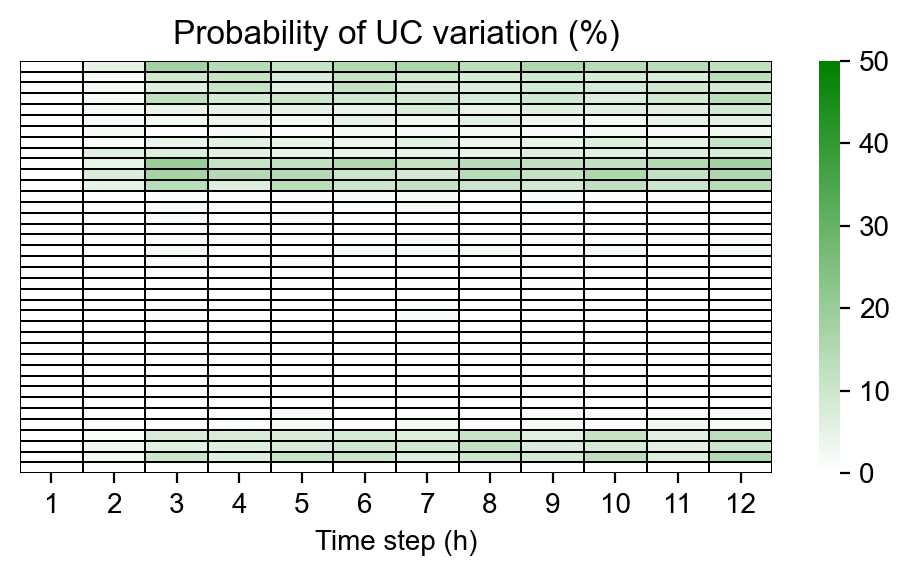

In [21]:
# Plot UC variation rate in each time step
# Create a custom continuous colormap
colors = ["white", "green"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)  # N=256 for a smooth transition

vmin = 0
vmax = 50

xticks = np.arange(1, 13)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
sns.heatmap(np.abs(test_UC_variation).mean(axis=0)*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar=True, xticklabels=xticks, yticklabels=False)
ax.set_title('Probability of UC variation (%)')
ax.set_xlabel('Time step (h)')

plt.tight_layout()
plt.show()
plt.close('all')

In [22]:
# Get UC ON/OFF variation in each time step
test_UC_ON_variation = (test_UC_variation > 0).astype(int)
test_UC_OFF_variation = (test_UC_variation < 0).astype(int)

# Get UC ON/OFF variation rate in each time step
test_UC_ON_variation_rate = test_UC_ON_variation.mean(axis=0)
test_UC_OFF_variation_rate = test_UC_OFF_variation.mean(axis=0)

In [23]:
# Create subplots
gs = GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 1], wspace=0.05, hspace=0.3)

# Create a custom continuous colormap
colors = ["purple", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)  # N=256 for a smooth transition

vmin = -50
vmax = 50

/var/folders/cn/s2z4sz3n33n4m238vt6kj7j40000gn/T/ipykernel_41358/1850536933.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


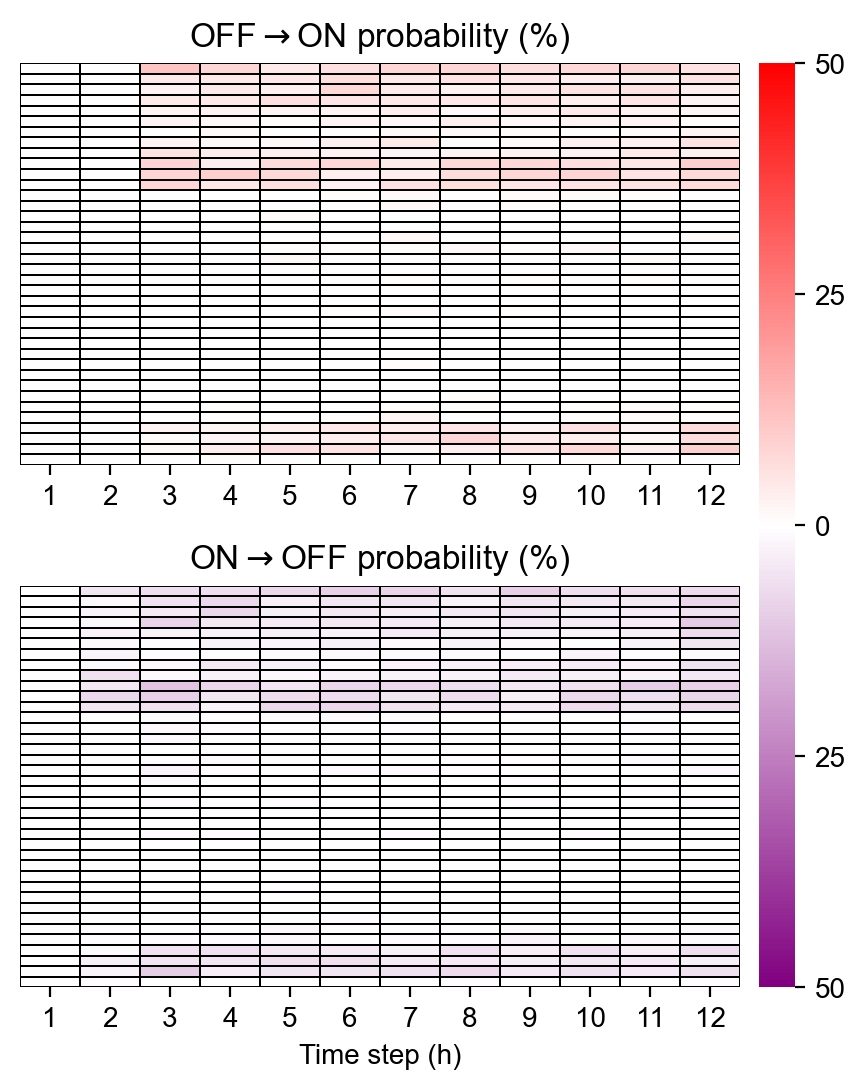

In [24]:
## Plot UC OFF to ON proportion
fig = plt.figure(figsize=(5, 6))
# Colorbar
cbar_ax = fig.add_subplot(gs[:, 1])

# UC OFF --> ON proportion
ax = fig.add_subplot(gs[0, 0])
xticks = np.arange(1, 13)
sns.heatmap(test_UC_ON_variation_rate*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar=False, xticklabels=xticks, yticklabels=False)
ax.set_title('OFF$\\rightarrow$ON probability (%)')

# UC ON --> OFF proportion
ax = fig.add_subplot(gs[1, 0])
xticks = np.arange(1, 13)
sns.heatmap(-test_UC_OFF_variation_rate*100, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, 
            linewidths=0.002, linecolor='black', cbar_ax=cbar_ax, xticklabels=xticks, yticklabels=False,
            cbar_kws={'ticks': np.linspace(-100, 100, 9)})
ax.set_xlabel('Time step (h)')
ax.set_title('ON$\\rightarrow$OFF probability (%)')

# Change colorbar ticcklables to positive
cbar_ax.set_yticklabels(np.abs(np.linspace(-100, 100, 9)).astype(int))

plt.tight_layout()
plt.show()
plt.close('all')